# Space Debris Lifetime Classification Data Preparation

This notebook consists of two parts:

* <b>[Part 1](#part_1)</b>: selects the space debris from the entire catalog of space objects from 1957 up to Jan. 23, 2024 and creates a lifetime class to be predicted by the ML model to be created
* <b>[Part 2](#part_2)</b>: acquires the orbital parameters (which would serve as input features to the ML model to be created) from the latest TLEs of the space debris selected from Part 1

Notebook created by: Adrian Josele G. Quional

<a id='part_1'></a>

## Part 1: Space Debris Selection

This part selects the space debris according to the following criteria: decayed and resided in Low-Earth Orbit (LEO). This part also creates orbital lifetime classes that is aimed to be predicted by the ML model.

In [1]:
import pandas as pd # for spreadsheet manipulation

* <i>Source of catalog (containing all space objects from 1957 up to Jan. 23, 2024): https://celestrak.org/satcat/search.php<i> 
* <i>SATCAT Format Documentation (for reference): https://celestrak.org/satcat/satcat-format.php</i>

In [2]:
# reading the catalog
satcat_df = pd.read_csv("satcat_celestrak.csv")
satcat_df

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.70,34.24,3826.0,653.0,0.122,NaN,EA,ORB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58733,AXIOM-3,2024-014A,58815,PAY,+,US,2024-01-18,AFETR,NaN,92.92,51.64,421.0,414.0,NaN,NaN,EA,ORB
58734,OBJECT C,2023-063C,58816,UNK,NaN,PRC,2023-05-10,WSC,NaN,92.05,41.47,381.0,368.0,NaN,NaN,EA,ORB
58735,OBJECT A,2024-015A,58817,PAY,+,IRAN,2024-01-20,SMTS,NaN,99.87,64.52,761.0,744.0,NaN,NaN,EA,ORB
58736,OBJECT B,2024-015B,58818,UNK,NaN,IRAN,2024-01-20,SMTS,NaN,99.77,64.51,756.0,739.0,NaN,NaN,EA,ORB


In [3]:
# dropping irrelevant columns
cols_to_drop = ["OBJECT_ID", "OPS_STATUS_CODE", "OWNER", "LAUNCH_SITE", "PERIOD", "INCLINATION", "RCS", 
                "DATA_STATUS_CODE", "ORBIT_CENTER", "ORBIT_TYPE"]

satcat_df = satcat_df.drop(labels=cols_to_drop, axis="columns")
satcat_df

,OBJECT_NAME,NORAD_CAT_ID,OBJECT_TYPE,LAUNCH_DATE,DECAY_DATE,APOGEE,PERIGEE
0,SL-1 R/B,1,R/B,1957-10-04,1957-12-01,938.0,214.0
1,SPUTNIK 1,2,PAY,1957-10-04,1958-01-03,1080.0,64.0
2,SPUTNIK 2,3,PAY,1957-11-03,1958-04-14,1659.0,211.0
3,EXPLORER 1,4,PAY,1958-02-01,1970-03-31,215.0,183.0
4,VANGUARD 1,5,PAY,1958-03-17,NaN,3826.0,653.0
...,...,...,...,...,...,...,...
58733,AXIOM-3,58815,PAY,2024-01-18,NaN,421.0,414.0
58734,OBJECT C,58816,UNK,2023-05-10,NaN,381.0,368.0
58735,OBJECT A,58817,PAY,2024-01-20,NaN,761.0,744.0
58736,OBJECT B,58818,UNK,2024-01-20,NaN,756.0,739.0


In [4]:
# selecting only those space objects that have decayed by dropping rows with a null DECAY_DATE
satcat_df.dropna(subset=["DECAY_DATE"], inplace=True)
satcat_df

,OBJECT_NAME,NORAD_CAT_ID,OBJECT_TYPE,LAUNCH_DATE,DECAY_DATE,APOGEE,PERIGEE
0,SL-1 R/B,1,R/B,1957-10-04,1957-12-01,938.0,214.0
1,SPUTNIK 1,2,PAY,1957-10-04,1958-01-03,1080.0,64.0
2,SPUTNIK 2,3,PAY,1957-11-03,1958-04-14,1659.0,211.0
3,EXPLORER 1,4,PAY,1958-02-01,1970-03-31,215.0,183.0
5,EXPLORER 3,6,PAY,1958-03-26,1958-06-28,1739.0,117.0
...,...,...,...,...,...,...,...
58605,KZ-1A R/B,58664,R/B,2023-12-27,2024-01-04,177.0,120.0
58608,STARLINK-31130,58667,PAY,2023-12-29,2024-01-04,191.0,185.0
58645,KZ-1A R/B,58704,R/B,2024-01-05,2024-01-15,108.0,81.0
58692,PEREGRINE,58751,PAY,2024-01-08,2024-01-18,NaN,NaN


In [5]:
# checking how many objects fall into a specific OBJECT_TYPE category
satcat_df.value_counts("OBJECT_TYPE")

OBJECT_TYPE
DEB    21333
PAY     4833
R/B     4177
UNK       39
dtype: int64

Getting only those that are space debris:

In [6]:
# filtering only those uncontrolled space objects (debris and rocket bodies)
# we consider objects of OBJECT_TYPE R/B (rocket body) and DEB (debris) collectively as space debris
debris_filter = (satcat_df["OBJECT_TYPE"] == "DEB") | (satcat_df["OBJECT_TYPE"] == "R/B")

satcat_deb_df = satcat_df[debris_filter] # filtering to only space debris

In [7]:
# dropping OBJECT_TYPE column since every object is of R/B and DEB type
# besides, OBJECT_NAME already specifies if a space object is a DEB or R/B
satcat_deb_df = satcat_deb_df.drop(labels="OBJECT_TYPE", axis="columns") 
satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,APOGEE,PERIGEE
0,SL-1 R/B,1,1957-10-04,1957-12-01,938.0,214.0
6,SL-1 R/B,7,1958-05-15,1958-12-03,1571.0,206.0
16,THOR ABLE R/B,17,1959-08-07,1961-06-30,40215.0,198.0
22,JUNO II R/B,23,1959-10-13,1989-07-16,249.0,225.0
27,THOR ABLE R/B,28,1960-04-01,1991-07-03,168.0,163.0
...,...,...,...,...,...,...
58582,DRAGON CRS-29 DEB,58641,2023-11-10,2024-01-10,154.0,132.0
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18,187.0,113.0
58605,KZ-1A R/B,58664,2023-12-27,2024-01-04,177.0,120.0
58645,KZ-1A R/B,58704,2024-01-05,2024-01-15,108.0,81.0


Getting only those space debris that are in Low-Earth Orbit (LEO):

In [8]:
# calculating the approximate orbital altitude of the space debris
# apogee - point where the debris is farthest from the Earth
# perigee - point where the debris is nearest from the Earth

pd.options.mode.chained_assignment = None  # default='warn' # suppressing the copy warning

# calculating the average altitude based on the apogee and perigee height
avg_orbital_alt = (satcat_deb_df["APOGEE"] + satcat_deb_df["APOGEE"]) / 2 
satcat_deb_df["AVG_ALTITUDE"] = avg_orbital_alt
satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,APOGEE,PERIGEE,AVG_ALTITUDE
0,SL-1 R/B,1,1957-10-04,1957-12-01,938.0,214.0,938.0
6,SL-1 R/B,7,1958-05-15,1958-12-03,1571.0,206.0,1571.0
16,THOR ABLE R/B,17,1959-08-07,1961-06-30,40215.0,198.0,40215.0
22,JUNO II R/B,23,1959-10-13,1989-07-16,249.0,225.0,249.0
27,THOR ABLE R/B,28,1960-04-01,1991-07-03,168.0,163.0,168.0
...,...,...,...,...,...,...,...
58582,DRAGON CRS-29 DEB,58641,2023-11-10,2024-01-10,154.0,132.0,154.0
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18,187.0,113.0,187.0
58605,KZ-1A R/B,58664,2023-12-27,2024-01-04,177.0,120.0,177.0
58645,KZ-1A R/B,58704,2024-01-05,2024-01-15,108.0,81.0,108.0


In [9]:
# filtering those space debris that are in LEO, which is approximately 160 km to 1000 km
leo_filter = (satcat_deb_df["AVG_ALTITUDE"] <= 1000) & (satcat_deb_df["AVG_ALTITUDE"] >= 160)

satcat_deb_df = satcat_deb_df[leo_filter]

In [10]:
# dropping APOGEE, PERIGEE, and AVG_ALTITUDE columns since those columns are already used to filter the catalog
# i.e., those columns are not needed anymore
satcat_deb_df = satcat_deb_df.drop(labels=["APOGEE", "PERIGEE", "AVG_ALTITUDE"], axis="columns") 
satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE
0,SL-1 R/B,1,1957-10-04,1957-12-01
22,JUNO II R/B,23,1959-10-13,1989-07-16
27,THOR ABLE R/B,28,1960-04-01,1991-07-03
29,THOR ABLESTAR R/B,30,1960-04-13,1961-08-18
32,THOR ABLESTAR DEB,33,1960-04-13,1960-07-17
...,...,...,...,...
58521,ELECTRON R/B,58580,2023-12-15,2024-01-12
58522,CZ-2F DEB,58581,2023-12-14,2024-01-01
58558,FIREFLY ALPHA R/B,58617,2023-12-22,2024-01-19
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18


Getting the actual lifetime of all space debris:

In [11]:
# converting first the LAUNCH_DATE and DECAY_DATE columns into datetime
satcat_deb_df["LAUNCH_DATE"] = pd.to_datetime(satcat_deb_df["LAUNCH_DATE"])
satcat_deb_df["DECAY_DATE"] = pd.to_datetime(satcat_deb_df["DECAY_DATE"])

# checking the dtypes to confirm
satcat_deb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22100 entries, 0 to 58605
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OBJECT_NAME   22100 non-null  object        
 1   NORAD_CAT_ID  22100 non-null  int64         
 2   LAUNCH_DATE   22100 non-null  datetime64[ns]
 3   DECAY_DATE    22100 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 863.3+ KB


It is confirmed that ```LAUNCH_DATE``` and ```DECAY_DATE``` has both been converted to ```datetime```.

In [12]:
# calculating the actual lifetime of the space object by subtracting the decay date and the launch date
satcat_deb_df["ACTUAL_LIFETIME"] = (pd.DatetimeIndex(satcat_deb_df["DECAY_DATE"]).year - 
                                    pd.DatetimeIndex(satcat_deb_df["LAUNCH_DATE"]).year)

satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME
0,SL-1 R/B,1,1957-10-04,1957-12-01,0
22,JUNO II R/B,23,1959-10-13,1989-07-16,30
27,THOR ABLE R/B,28,1960-04-01,1991-07-03,31
29,THOR ABLESTAR R/B,30,1960-04-13,1961-08-18,1
32,THOR ABLESTAR DEB,33,1960-04-13,1960-07-17,0
...,...,...,...,...,...
58521,ELECTRON R/B,58580,2023-12-15,2024-01-12,1
58522,CZ-2F DEB,58581,2023-12-14,2024-01-01,1
58558,FIREFLY ALPHA R/B,58617,2023-12-22,2024-01-19,1
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18,1


In [13]:
# summary statistics for the lifetime
satcat_deb_df["ACTUAL_LIFETIME"].describe()

count    22100.000000
mean         9.558190
std         12.944042
min          0.000000
25%          0.000000
50%          3.000000
75%         15.000000
max         62.000000
Name: ACTUAL_LIFETIME, dtype: float64

In [14]:
# checking the median lifetime
satcat_deb_df["ACTUAL_LIFETIME"].median()

3.0

In [15]:
# for plotting the distributions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

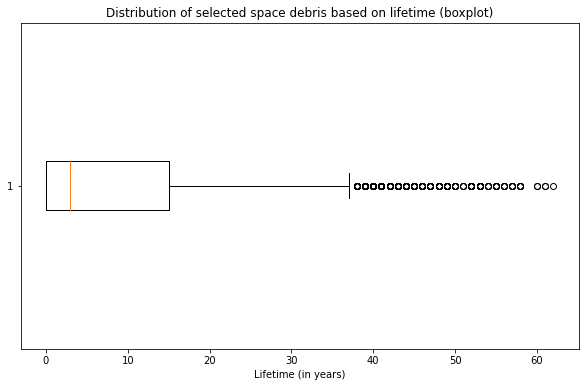

In [16]:
# visualizing the distribution of the selected space objects in terms of lifetime (boxplot)
plt.figure(figsize=(10,6))
plt.boxplot(satcat_deb_df["ACTUAL_LIFETIME"], vert=False)
plt.title("Distribution of selected space debris based on lifetime (boxplot)")
plt.xlabel("Lifetime (in years)")
plt.show()

In [17]:
def spaceobj_lifetime_distribution_viz(data, hist_title):
    """
    Creates a histogram to show the distribution of the selected space objects in terms of orbital lifetime.
    
    Args:
        data (DataFrame): DataFrame containing the information about the space objects.
        hist_title (str): Histogram title.
        
    Returns:
        None
    """
    
    # visualizing the distribution of the selected space objects in terms of lifetime (histogram)
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x="ACTUAL_LIFETIME", bins=max(data["ACTUAL_LIFETIME"]))
    plt.title(hist_title)
    plt.xlabel("Lifetime (in years)")
    plt.xticks(np.arange(min(data["ACTUAL_LIFETIME"]), max(data["ACTUAL_LIFETIME"])+1, 5.0))
    plt.show()

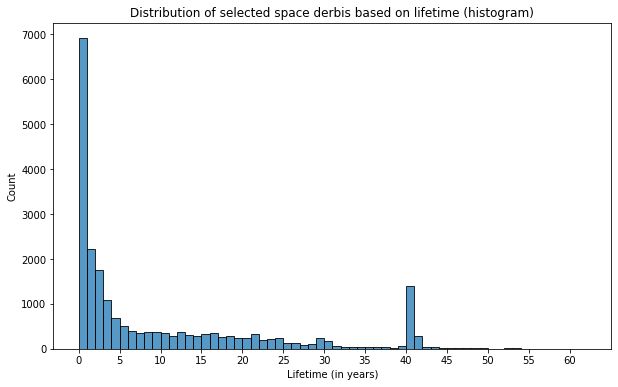

In [18]:
# plotting the distribution of the space debris in terms of their orbital lifetime 
spaceobj_lifetime_distribution_viz(data=satcat_deb_df, 
                                   hist_title="Distribution of selected space derbis based on lifetime (histogram)")

It can be shown that the number of objects based on lifetime is highly imbalanced.

In [19]:
# getting the actual number of debris per lifetime
satcat_deb_df.groupby("ACTUAL_LIFETIME")["OBJECT_NAME"].count()

ACTUAL_LIFETIME
0     6917
1     2224
2     1761
3     1097
4      692
      ... 
57       5
58       5
60       2
61       2
62       1
Name: OBJECT_NAME, Length: 62, dtype: int64

In [20]:
# dropping objects that has a lifetime of 0 years since they highly skew the listing
more_than_0_years_filter = satcat_deb_df["ACTUAL_LIFETIME"] > 0

satcat_deb_df = satcat_deb_df[more_than_0_years_filter]
satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME
22,JUNO II R/B,23,1959-10-13,1989-07-16,30
27,THOR ABLE R/B,28,1960-04-01,1991-07-03,31
29,THOR ABLESTAR R/B,30,1960-04-13,1961-08-18,1
36,SPUTNIK 4 DEB,37,1960-05-15,1961-06-30,1
61,JUNO II R/B,62,1960-11-03,1985-10-27,25
...,...,...,...,...,...
58521,ELECTRON R/B,58580,2023-12-15,2024-01-12,1
58522,CZ-2F DEB,58581,2023-12-14,2024-01-01,1
58558,FIREFLY ALPHA R/B,58617,2023-12-22,2024-01-19,1
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18,1


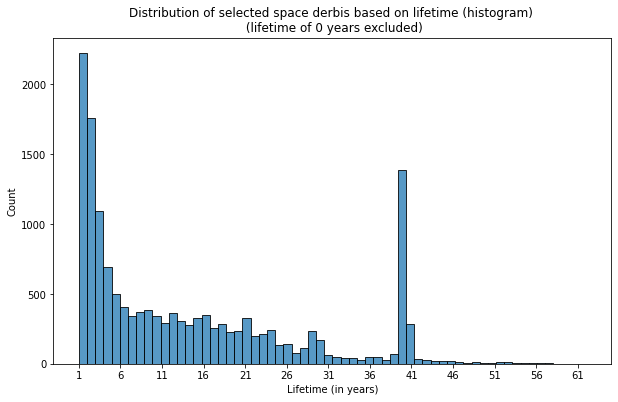

In [21]:
# plotting the distribution of the space debris again in terms of their orbital lifetime 
spaceobj_lifetime_distribution_viz(data=satcat_deb_df, 
                                   hist_title="Distribution of selected space derbis based on lifetime (histogram) \n (lifetime of 0 years excluded)")

Creating lifetime classes based on the lifetime distribution:

In [22]:
# checking how many space debris has a lifetime between 1 and 3 years
lifetime_class_1_filter = (satcat_deb_df["ACTUAL_LIFETIME"] >= 1) & (satcat_deb_df["ACTUAL_LIFETIME"] <= 3)
satcat_deb_df[lifetime_class_1_filter]["NORAD_CAT_ID"].count()

5082

In [23]:
# checking how many space debris has a lifetime between 3 and 17 years
lifetime_class_2_filter = (satcat_deb_df["ACTUAL_LIFETIME"] > 3) & (satcat_deb_df["ACTUAL_LIFETIME"] <= 17)
satcat_deb_df[lifetime_class_2_filter]["NORAD_CAT_ID"].count()

5204

In [24]:
# checking how many space debris has a lifetime of more than 17 years
lifetime_class_3_filter = (satcat_deb_df["ACTUAL_LIFETIME"] > 17)
satcat_deb_df[lifetime_class_3_filter]["NORAD_CAT_ID"].count()

4897

In [25]:
def classify_lifetime(lifetime):
    """
    Creates a lifetime class depending on the actual lifetime of the space debris in years:
    Class 1 - space debris has a lifetime between 1 and 3 years (both inclusive)
    Class 2 - space debris has a lifetime between 3 and 17 years (lower bound exclusive, upper bound inclusive)
    Class 3 - space debris has a lifetime of more than 17 years
    
    Args:
        lifetime (pandas Series): Column containing the lifetime of the space debris in years
        
    Returns:
        1 (int) - if the space debris belongs to Class 1
        2 (int) - if the space debris belongs to Class 2
        3 (int) - if the space debris belongs to Class 3
    """
    if lifetime >= 1 and lifetime <= 3:
        return 1
    elif lifetime > 3 and lifetime <= 17:
        return 2
    else:
        return 3

In [26]:
# classifies each space debris into one of three lifetime classes
satcat_deb_df["LIFETIME_CLASS"] = satcat_deb_df["ACTUAL_LIFETIME"].apply(classify_lifetime)
satcat_deb_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME,LIFETIME_CLASS
22,JUNO II R/B,23,1959-10-13,1989-07-16,30,3
27,THOR ABLE R/B,28,1960-04-01,1991-07-03,31,3
29,THOR ABLESTAR R/B,30,1960-04-13,1961-08-18,1,1
36,SPUTNIK 4 DEB,37,1960-05-15,1961-06-30,1,1
61,JUNO II R/B,62,1960-11-03,1985-10-27,25,3
...,...,...,...,...,...,...
58521,ELECTRON R/B,58580,2023-12-15,2024-01-12,1,1
58522,CZ-2F DEB,58581,2023-12-14,2024-01-01,1,1
58558,FIREFLY ALPHA R/B,58617,2023-12-22,2024-01-19,1,1
58594,CZ-11 R/B,58653,2023-12-25,2024-01-18,1,1


In [27]:
# rechecking the count of space debris belonging to a particular LIFETIME_CLASS
satcat_deb_df.value_counts("LIFETIME_CLASS", sort=False)

LIFETIME_CLASS
1    5082
2    5204
3    4897
dtype: int64

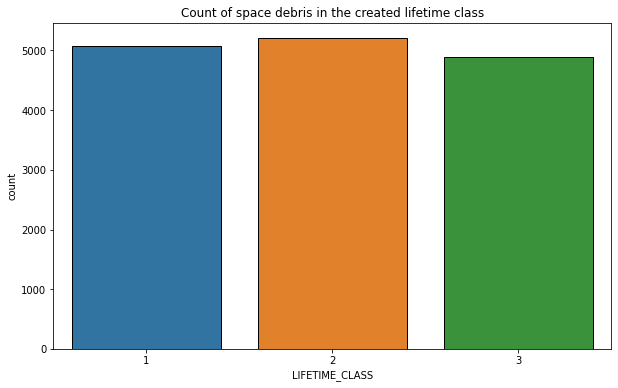

In [28]:
# visualizing the count of space debris in each LIFETIME_CLASS
plt.figure(figsize=(10,6))
sns.countplot(x='LIFETIME_CLASS', data=satcat_deb_df, edgecolor="black")
plt.title("Count of space debris in the created lifetime class")
plt.show()

It can be seen that the number of objects belonging on a certain ```LIFETIME_CLASS``` is now roughly uniformly distributed.

In [29]:
# storing the NORAD IDs the selected space debris to a list for TLE acquisition
space_deb_norad_ids_list = list(satcat_deb_df["NORAD_CAT_ID"])

# checking
print(f"Length of NORAD ID list: {len(space_deb_norad_ids_list)}")
print(f"First NORAD ID: {space_deb_norad_ids_list[0]}")
print(f"Last NORAD ID: {space_deb_norad_ids_list[-1]}")

Length of NORAD ID list: 15183
First NORAD ID: 23
Last NORAD ID: 58664


<a id='part_2'></a>

## Part 2: Orbital Parameter Acquisition using TLE

This part acquires all latest TLEs of the selected space debris from the previous part. After getting all the latest TLEs, the orbital parameters (and the drag) would be parsed. Later on, the acquired parameters for each space debris would be merged to the original DataFrame containing the lifetime of each space debris. The merged DataFrame would be the final output of this notebook.

Getting the latest TLEs of all selected space debris:

In [30]:
# creating a spacetrack client using the spacetrack module
from spacetrack import SpaceTrackClient

# spacetrack_credentials.txt contains the space-track.org login credentials (to preserve privacy)
# first line of the text file contains the username
# second line of the text file contains the password
with open("spacetrack_credentials.txt", 'r') as f:
    credentials = f.readlines()
    
username = credentials[0].rstrip() # the username can be put here directly as a string
password = credentials[1].rstrip() # the password can be put here directly as a string

st = SpaceTrackClient(username, password)

References to the ```spacetrack``` module:

* PyPI: https://pypi.org/project/spacetrack/
* Documentation: https://spacetrack.readthedocs.io/en/stable/
* GitHub: https://github.com/python-astrodynamics/spacetrack

In [31]:
# dividing the NORAD ID list into batches of 500 NORAD IDs each to prevent timeout errors in the TLE acquisition
space_deb_norad_ids_list_batches = [space_deb_norad_ids_list[i:i+500] for i in range(0, len(space_deb_norad_ids_list), 500)]

# checking the number of batches
print(f"Number of NORAD ID batches: {len(space_deb_norad_ids_list_batches)}")

Number of NORAD ID batches: 31


In [32]:
import time # to add a delay between TLE requests
# Note: space-track.org limits API queries to less than 30 requests per minute / 300 requests per hour

In [34]:
# acquiring all the latest TLEs of the selected space debris
# Note: it will take some time to download all the latest TLEs; and sometimes, a timeout error would be experienced

# initializing a list containing strings of TLEs
latest_tles_list = []

# get all the latest TLEs of space debris in each NORAD ID batch
for batch_num in range(len(space_deb_norad_ids_list_batches)):
    latest_tles = st.tle_latest(norad_cat_id=space_deb_norad_ids_list_batches[batch_num], ordinal=1, format='tle')
    latest_tles_list.append(latest_tles)
    print(f"Batch {batch_num} of NORAD IDs processed.")
    
    # time delay before acquiring latest TLEs for another NORAD ID batch
    time.sleep(5)
    
print()
print("All latest TLEs acquired.")

Batch 0 of NORAD IDs processed.
Batch 1 of NORAD IDs processed.
Batch 2 of NORAD IDs processed.
Batch 3 of NORAD IDs processed.
Batch 4 of NORAD IDs processed.
Batch 5 of NORAD IDs processed.
Batch 6 of NORAD IDs processed.
Batch 7 of NORAD IDs processed.
Batch 8 of NORAD IDs processed.
Batch 9 of NORAD IDs processed.
Batch 10 of NORAD IDs processed.
Batch 11 of NORAD IDs processed.
Batch 12 of NORAD IDs processed.
Batch 13 of NORAD IDs processed.
Batch 14 of NORAD IDs processed.
Batch 15 of NORAD IDs processed.
Batch 16 of NORAD IDs processed.
Batch 17 of NORAD IDs processed.
Batch 18 of NORAD IDs processed.
Batch 19 of NORAD IDs processed.
Batch 20 of NORAD IDs processed.
Batch 21 of NORAD IDs processed.
Batch 22 of NORAD IDs processed.
Batch 23 of NORAD IDs processed.
Batch 24 of NORAD IDs processed.
Batch 25 of NORAD IDs processed.
Batch 26 of NORAD IDs processed.
Batch 27 of NORAD IDs processed.
Batch 28 of NORAD IDs processed.
Batch 29 of NORAD IDs processed.
Batch 30 of NORAD ID

In [35]:
# combining all TLE lines to a single big TLE string then splitting it for eventual orbital parameter acquisition
appended_latest_tles = ''

for latest_tles in latest_tles_list:
    appended_latest_tles += latest_tles
    
# splitting the latest_tles string and storing each line as an element in a list
latest_tles_splitted = appended_latest_tles.splitlines()

In [36]:
# checking if all space debris have TLEs
print(f"Acquired TLEs: {len(latest_tles_splitted) // 2}")
print(f"All selected space debris: {len(space_deb_norad_ids_list)}")
print(f"Difference: {len(space_deb_norad_ids_list) - len(latest_tles_splitted) // 2}")

Acquired TLEs: 15094
All selected space debris: 15183
Difference: 89


There are 89 TLEs missing.

Finding out which space debris have missing TLEs:

In [37]:
processed_norad_ids = []

for i in range (0, len(latest_tles_splitted), 2): 
    # getting two lines at a time
    two_lines = latest_tles_splitted[i:i+2]
    
    # getting only the second line to easily get the NORAD ID
    line2 = two_lines[1]
    
    # collecting all processed NORAD IDs
    processed_norad_ids.append(int(line2[2:7]))
    
# finding out which space debris have missing TLEs by checking the initial and the processed NORAD IDs
norad_ids_of_missing_tles = list(set(space_deb_norad_ids_list) - set(processed_norad_ids))
print(norad_ids_of_missing_tles)
print()
print(f"Number of NORAD IDs with missing TLEs: {len(norad_ids_of_missing_tles)}")

[29697, 29698, 29699, 29700, 29701, 29702, 29703, 29704, 29705, 29706, 29707, 13327, 2080, 13856, 13858, 6179, 13859, 13860, 13861, 13862, 13863, 13864, 13866, 13867, 28715, 28720, 2103, 24636, 13905, 5719, 14428, 14959, 8312, 27771, 5270, 39063, 39064, 39065, 39066, 21681, 1724, 4803, 709, 39121, 14035, 5845, 24790, 14042, 4832, 1762, 1781, 9474, 18203, 15134, 1824, 17714, 1845, 10551, 10552, 5444, 39257, 3420, 14697, 1908, 13690, 30589, 37261, 37262, 37263, 6041, 6051, 3500, 18868, 37815, 11193, 30651, 37833, 14832, 29683, 29684, 29685, 29686, 32244, 29689, 29691, 29692, 29693, 29694, 29695]

Number of NORAD IDs with missing TLEs: 89


Parsing the orbital parameters present in the TLEs:

In [38]:
import ephem # PyEphem astronomy library to process TLE data

References to the ```ephem``` module:

* PyPI: https://pypi.org/project/ephem/
* Website: https://rhodesmill.org/pyephem/
* GitHub: https://github.com/brandon-rhodes/pyephem

In [39]:
orbital_params = [] # stores all of the processed orbital parameters from the latest TLEs

for i in range (0, len(latest_tles_splitted), 2): 
    # getting two lines at a time
    two_lines = latest_tles_splitted[i:i+2]
    
    # Sample TLE Reference:
    # NOAA 14                 
    # 1 23455U 94089A   97320.90946019  .00000140  00000-0  10191-3 0  2621
    # 2 23455  99.0090 272.6745 0008546 223.1686 136.8816 14.11711747148495
    line0 = "SPACE DEBRIS NAME" # exact space debris name is not really needed for processing, but exact name can be put
    line1 = two_lines[0]
    line2 = two_lines[1]
    
    # getting the NORAD ID from the TLE
    norad_id_of_TLE = int(line2[2:7])
    
    # reading the TLE
    space_obj = ephem.readtle(line0, line1, line2)
    
    # getting the orbital parameters from the TLE
    space_obj_inc = space_obj.inc # Inclination
    space_obj_eccen = space_obj.e # Eccentricity
    space_obj_raan = space_obj.raan # Right Ascension of the Ascending Node
    space_obj_argper = space_obj.ap # Argument of Perigee
    space_obj_manomaly = space_obj.M # Mean Anomaly
    space_obj_mmotion = space_obj.n # Mean Motion
    space_obj_drag = space_obj.drag # Drag
    
    # [NORAD_ID, INCLINATION, ECCENTRICITY, RAAN, ARGUMENT_OF_PERIGEE, MEAN_ANOMALY, MEAN_MOTION, DRAG]
    orbital_params.append([norad_id_of_TLE, space_obj_inc, space_obj_eccen, space_obj_raan, 
                           space_obj_argper, space_obj_manomaly, space_obj_mmotion, space_obj_drag])

In [40]:
# creating a data frame out of the list of orbital parameters
# for reference: [NORAD_ID, INCLINATION, ECCENTRICITY,, RAAN, ARGUMENT_OF_PERIGEE, MEAN_ANOMALY, MEAN_MOTION, DRAG]
orbital_params_df = pd.DataFrame(orbital_params, columns=["NORAD_CAT_ID", "INCLINATION", "ECCENTRICITY", "RAAN", 
                                                          "ARGUMENT_OF_PERIGEE", "MEAN_ANOMALY", "MEAN_MOTION", "DRAG"])

orbital_params_df

,NORAD_CAT_ID,INCLINATION,ECCENTRICITY,RAAN,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG
0,23,50.267399,0.001834,226.973404,32.571201,327.563812,16.135613,0.003006
1,28,48.342602,0.000363,203.336899,333.182892,26.922001,16.401144,0.001474
2,30,51.250000,0.000000,356.489197,331.947296,28.052601,16.293583,0.000000
3,37,64.889900,0.019840,343.241089,333.420105,27.084000,15.498003,0.000000
4,62,49.885201,0.000462,300.265198,342.185089,17.966299,16.411893,0.001403
...,...,...,...,...,...,...,...,...
15089,58580,41.998699,0.004600,271.990295,106.769600,253.822906,16.260958,0.001544
15090,58581,50.253101,0.005231,188.243607,256.066101,103.450798,15.988498,0.005506
15091,58617,140.006699,0.003414,178.050995,14.218700,53.426998,16.397195,0.000534
15092,58653,97.170700,0.005719,28.422600,252.425293,233.912796,16.459380,0.000139


In [41]:
# merging the two dataframes
# the rest of the space debris from the original dataframe of 15183 objects that doesn't have the NORAD ID of the final list
# would automatically be filtered out
final_space_debris_df = satcat_deb_df.merge(orbital_params_df, on="NORAD_CAT_ID")
final_space_debris_df

,OBJECT_NAME,NORAD_CAT_ID,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME,LIFETIME_CLASS,INCLINATION,ECCENTRICITY,RAAN,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG
0,JUNO II R/B,23,1959-10-13,1989-07-16,30,3,50.267399,0.001834,226.973404,32.571201,327.563812,16.135613,0.003006
1,THOR ABLE R/B,28,1960-04-01,1991-07-03,31,3,48.342602,0.000363,203.336899,333.182892,26.922001,16.401144,0.001474
2,THOR ABLESTAR R/B,30,1960-04-13,1961-08-18,1,1,51.250000,0.000000,356.489197,331.947296,28.052601,16.293583,0.000000
3,SPUTNIK 4 DEB,37,1960-05-15,1961-06-30,1,1,64.889900,0.019840,343.241089,333.420105,27.084000,15.498003,0.000000
4,JUNO II R/B,62,1960-11-03,1985-10-27,25,3,49.885201,0.000462,300.265198,342.185089,17.966299,16.411893,0.001403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15089,ELECTRON R/B,58580,2023-12-15,2024-01-12,1,1,41.998699,0.004600,271.990295,106.769600,253.822906,16.260958,0.001544
15090,CZ-2F DEB,58581,2023-12-14,2024-01-01,1,1,50.253101,0.005231,188.243607,256.066101,103.450798,15.988498,0.005506
15091,FIREFLY ALPHA R/B,58617,2023-12-22,2024-01-19,1,1,140.006699,0.003414,178.050995,14.218700,53.426998,16.397195,0.000534
15092,CZ-11 R/B,58653,2023-12-25,2024-01-18,1,1,97.170700,0.005719,28.422600,252.425293,233.912796,16.459380,0.000139


In [42]:
# dropping and rearranging columns - moving the information about the lifetime as the last columns
final_space_debris_df = final_space_debris_df.reindex(["OBJECT_NAME", "NORAD_CAT_ID", 
                                                       "INCLINATION", "ECCENTRICITY", "RAAN", "ARGUMENT_OF_PERIGEE",
                                                       "MEAN_ANOMALY", "MEAN_MOTION", "DRAG", 
                                                       "LAUNCH_DATE", "DECAY_DATE", "ACTUAL_LIFETIME", "LIFETIME_CLASS"], 
                                                      axis="columns")

final_space_debris_df

,OBJECT_NAME,NORAD_CAT_ID,INCLINATION,ECCENTRICITY,RAAN,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME,LIFETIME_CLASS
0,JUNO II R/B,23,50.267399,0.001834,226.973404,32.571201,327.563812,16.135613,0.003006,1959-10-13,1989-07-16,30,3
1,THOR ABLE R/B,28,48.342602,0.000363,203.336899,333.182892,26.922001,16.401144,0.001474,1960-04-01,1991-07-03,31,3
2,THOR ABLESTAR R/B,30,51.250000,0.000000,356.489197,331.947296,28.052601,16.293583,0.000000,1960-04-13,1961-08-18,1,1
3,SPUTNIK 4 DEB,37,64.889900,0.019840,343.241089,333.420105,27.084000,15.498003,0.000000,1960-05-15,1961-06-30,1,1
4,JUNO II R/B,62,49.885201,0.000462,300.265198,342.185089,17.966299,16.411893,0.001403,1960-11-03,1985-10-27,25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15089,ELECTRON R/B,58580,41.998699,0.004600,271.990295,106.769600,253.822906,16.260958,0.001544,2023-12-15,2024-01-12,1,1
15090,CZ-2F DEB,58581,50.253101,0.005231,188.243607,256.066101,103.450798,15.988498,0.005506,2023-12-14,2024-01-01,1,1
15091,FIREFLY ALPHA R/B,58617,140.006699,0.003414,178.050995,14.218700,53.426998,16.397195,0.000534,2023-12-22,2024-01-19,1,1
15092,CZ-11 R/B,58653,97.170700,0.005719,28.422600,252.425293,233.912796,16.459380,0.000139,2023-12-25,2024-01-18,1,1


In [43]:
# rechecking the count of space debris belonging to a particular LIFETIME_CLASS
final_space_debris_df.value_counts("LIFETIME_CLASS", sort=False)

LIFETIME_CLASS
1    5041
2    5161
3    4892
dtype: int64

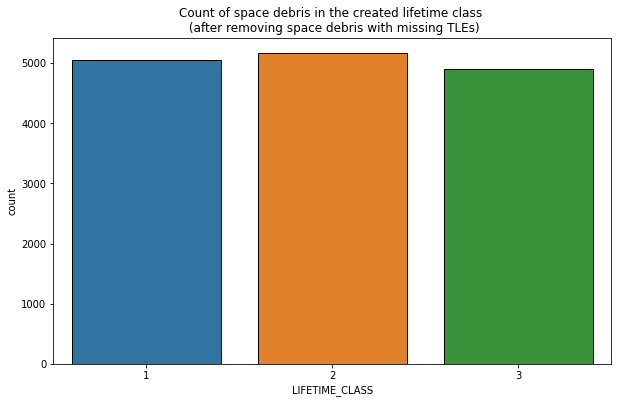

In [44]:
# visualizing the count of space debris in each LIFETIME_CLASS taking into account those space debris with missing TLEs
plt.figure(figsize=(10,6))
sns.countplot(x='LIFETIME_CLASS', data=final_space_debris_df, edgecolor="black")
plt.title("Count of space debris in the created lifetime class \n (after removing space debris with missing TLEs)")
plt.show()

As can be seen, the number of space debris belonging to a certain ```LIFETIME_CLASS``` is still roughly uniformly distributed even after removing those space debris that do no have TLEs.

In [45]:
# saving the processed data to a CSV file for later ingestion to the ML model
final_space_debris_df.to_csv("final_space_debris_df.csv", index=False)